## MultiTree objects
Toytree supports the use of MultiTree objects to store lists of linked trees, such as bootstrap replicates or trees sampled from a posterior distribution. MultiTree objects can be generated from a list of Toytrees or newick strings, or by parsing a file, url, or string of text that includes newick trees separated by newlines. The convenience function for creating MuliTrees is `toytree.mtree()`. 

In [1]:
import toytree
import toyplot
import numpy as np

### Parsing data into MultiTrees

An example string or file representing multiple trees as newick strings:

In [2]:
string = """\
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,d:1):1,(b:1,e:1):1):1,c:3);
(((a:1.5,b:1.5):1,(d:1,e:1):1.5):1,c:3.5);
(((a:1.25,b:1.25):0.75,(d:1,e:1):1):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):2,c:4);
(((a:1.5,b:1.5):0.5,(d:1,e:1):1):1,c:3);
(((b:1.5,d:1.5):0.5,(a:1,e:1):1):1,c:3);
"""

Create a MultiTree object by passing the input data to `toytree.mtree()`. The `treelist` attribute of `mtree` objects provides a list of the trees in it. These can be indexed like any list and each individual item is a ToyTree, which can be drawn or manipulated like any normal `ToyTree` class object. 

In [3]:
# create an mtree from a string, list of strings, url, or file.
mtre0 = toytree.mtree(string)

# access the treelist
mtre0.treelist

In [4]:
# create an mtree object from a list of ToyTrees (can be sliced like any list)
mtre1 = toytree.mtree(mtre0.treelist[:5])

# access the treelist
mtre1.treelist

### Consensus trees

Before we get into the plotting features of MultiTrees, let's first explore several useful functions that toytree provides for analyzing groups of trees. First, we can infer a majority-rule consensus tree from a group of input topologies. The `.get_consensus_tree` function will return a ToyTree with the consensus topology and clade supports stored on nodes as the "support" feature. 

In [5]:
ctre = mtre0.get_consensus_tree().root('c')
ctre.draw(node_labels='support', use_edge_lengths=False);

a b d e c idx: 5
name: 5
dist: 75
support: 75
height: 100 75 idx: 6
name: 6
dist: 75
support: 75
height: 100 75 idx: 7
name: 7
dist: 50
support: 100
height: 175 100 idx: 8
name: 7
dist: 0
support: 100
height: 225 100

### Access ToyTrees in the treelist

You can access each item in a treelist and plot it to examine the variation in topologies individually. Or you can do any other calculations you wish using the underlying TreeNode objects. Below we iterate over all toytree objects in the treelist and extract the underlying TreeNode and pass each to the consensus tree's TreeNode object which has a function to calculate Robinson-Foulds distances. This is a measure of the topological mismatch between the trees. 

In [6]:
# calculate Robinson-Foulds distances between consensus and each individual tree
[ctre.treenode.robinson_foulds(i.treenode)[0] for i in mtre0.treelist]

[0, 4, 0, 0, 0, 0, 0, 4]

In [7]:
# iterate over treelist and plot each tree on a separate canvas
for tre in mtre0.treelist:
    tre.draw(height=200, width=300);

e d b a c

e b d a c

e d b a c

e d b a c

e d b a c

e d b a c

e d b a c

e a d b c

### TreeGrid plot
A bit simpler still you can use the `TreeGrid` plotting method to make a Canvas of Toytree plots spaced on a grid. A similar plot an be made by using Canvas and Axes arguments, as explained in the Quick Guide, but this is a quick shortcut for examining a number of trees. 

In [8]:
mtre0.draw_tree_grid(
    x=2, y=5, start=0, 
    width=700, 
    height=350, 
    edge_type='c',
)

e d b a c e b d a c e d b a c e d b a c e d b a c e d b a c e d b a c e a d b c

### Fixing the tip order
With MultiTree plots the goal is often to view discordance among trees, which can be made more apparent by fixing the tip order so that the tips or the same in all trees. You can fix the tip order among all ToyTrees in the treelist of a MultiTree by using the `fixed_order` argument when you create the MultiTree. Here I create a new MultiTree object from our existing one, but fix the order of tips and then plot the TreeGrid again. You can see the discordance much more clearly now. With `fixed_order` you can enter a list of the order in which you want the tips, or simply use True, like below, to use the majority-rule consensus tip order. 

In [9]:
mtre1 = toytree.mtree(mtre0.treelist, fixed_order=True)
mtre1.draw_tree_grid(
    x=2, y=5, start=0, 
    width=700, 
    height=350, 
    edge_type='c',
)

a b d e c a b d e c a b d e c a b d e c a b d e c a b d e c a b d e c a b d e c

### CloudTree plot
It can be more informative still to plot a number of trees on top of each other. These are sometimes called "densitree" plots, or here, "cloud tree plots". A bit of detail: These can become quite cumbersome inside a jupyter notebook since the underlying HTML of each tree grows large when you plot thousands of trees. For this reason toytree returns cloudtrees in "png" format by default. This simply compacts the information into a bitmap of pixels. You can override it if you wish by using the html=True argument as below. 

In [10]:
# draw cloud tree (here with some extra styling)
mtre0.draw_cloud_tree(
    orient='right',
    width=300,
    html=True,
    tip_labels=['<b>cloud-tip {}</b>'.format(i) for i in mtre0.get_tip_labels()],
);

cloud-tip a cloud-tip b cloud-tip d cloud-tip e cloud-tip c

Here is an example in "png" format. You can see the only real difference is in the placement of the canvas. Not centered. Otherwise all styling acts the same. The difference between the format used to plot in the notebook does not effect the format you use to store the figure when you save it to disk. You set that format when you save it, e.g., using PDF, SVG, PNG, etc. 

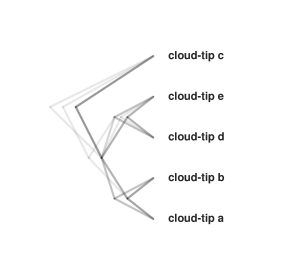

In [11]:
# draw cloud tree in PNG form can display all the same styling 
c, a = mtre0.draw_cloud_tree(
    width=300,
    tip_labels=['<b>cloud-tip {}</b>'.format(i) for i in mtre0.get_tip_labels()],
)

### Example: <i>Xiphophorus fishes</i> 
Data set for reconstructing a densitree figure from [Cui et al. (2013)](https://datadryad.org/resource/doi:10.5061/dryad.8bt72/1). I've taken the nexus file from the paper's dryad repository and converted it to newick and saved it online so it can be easily downloaded. The file contains 160 trees representing mrbayes consensus trees inferred for different genomic regions. 

In [12]:
fish = toytree.mtree("https://eaton-lab.org/data/Xiphophorus-160mb-consenstrees.tre")

In [13]:
fish.draw_tree_grid(
    height=300, 
    width=700,
    tip_labels_style={"font-size": "8px"},
);

Xmalinche_CHIC2 Xbirchmanni_GARC Xcortezi Xnezahuacoyotl Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xmeyeri Xgordoni Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Psjonesii Priapella Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmeyeri Xgordoni Xcouchianus Xxiphidium Xvariatus Xandersi Xmilleri Xevelynae Xmaculatus_JpWild Xclemenciae_G Xmonticolus Xsignum Xmayae Xhellerii Xalvarezi Psjonesii Priapella Xmeyeri Xgordoni Xcouchianus Xxiphidium Xandersi Xvariatus Xevelynae Xmilleri Xmaculatus_JpWild Xclemenciae_G Xmonticolus Xmalinche_CHIC2 Xbirchmanni_GARC Xcortezi Xnezahuacoyotl Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xsignum Xhellerii Psjonesii Priapella Xnezahuacoyotl Xcortezi Xmalinche_CHIC2 Xbirchmanni_GARC Xmontezumae Xnigrensis Xmultilineatus Xpygmaeus Xcontinens Xmayae Xalvarezi Xsignum Xhellerii Xclemenciae_G Xmonticolus Xxiphidium Xmeyeri Xgordoni Xcouchianus Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Psjonesii Priapella <g class="toyplot-coordinates-Cartesian" id="ta3934d13

#### Fixed tip order
When plotting cloudtrees the order of names at the tips will be fixed across trees, this is required in order to see disagreement among topologies. For example, we can fix the order across all trees in a multitree object's treelist by setting `fixed_order=True`. This is the default tip order that will be used in cloudtree drawings. The tips are ordered by the order of the consensus tree. With the tip order fixed disagreements among trees are easier to observe. 

In [14]:
# make a MultiTree with tips ordered by the majority-rule consensus tree tip order
ofish = toytree.mtree(fish.treelist, fixed_order=True)
ofish.draw_tree_grid(
    height=300, 
    width=700, 
    edge_type='c', 
    tip_labels_style={"font-size": "9px"},
)

Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii Xnezahuacoyotl Xcortezi Xbirchmanni_GARC Xmalinche_CHIC2 Xmontezumae Xcontinens Xpygmaeus Xnigrensis Xmultilineatus Xgordoni Xmeyeri Xcouchianus Xvariatus Xevelynae Xmilleri Xxiphidium Xandersi Xmaculatus_JpWild Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Priapella Psjonesii

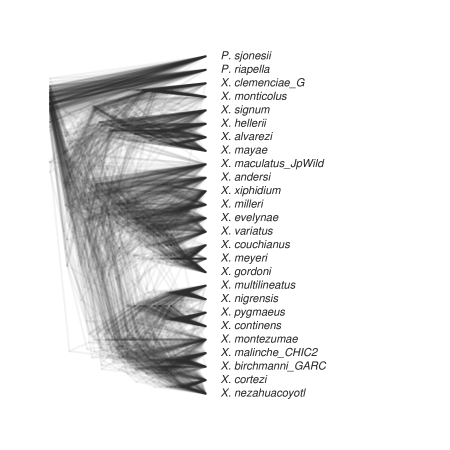

In [15]:
# draw a cloud tree which enforces a fixed tip order
ofish.draw_cloud_tree(
    height=450, 
    width=450,
    orient='right',
    edge_style={
        'stroke': "#262626",
        'opacity': 0.05,
    },
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in ofish.get_tip_labels()],
    tip_labels_style={
        "font-size": "11px",
    }
);

#### Custom tip order 
If the `fixed_order` argument is provided as a list of names then tips of the tree will be ordered according to the list. Take note: the structure of the relationships in the tree (e.g., the newick representation) does not change with fixed_order, this is simply changing the order that tips are presented when plotting. For example, the tip order below was used in the published paper by Cui et al. since it shows the geographic distributions of clades nicely ordered from north to south. When entering names as a list the order of names is plotted from bottom (x axis=0) to the top location on a right-facing tree. 

In [16]:
customorder = [
    "Priapella",
    "Psjonesii",
    "Xmayae",
    "Xalvarezi",
    "Xhellerii",
    "Xsignum",
    "Xmonticolus",
    "Xclemenciae_G",
    "Xbirchmanni_GARC",
    "Xmalinche_CHIC2",
    "Xcortezi",
    "Xnezahuacoyotl",
    "Xmontezumae",   
    "Xcontinens",
    "Xpygmaeus",
    "Xmultilineatus",    
    "Xnigrensis",
    "Xgordoni",
    "Xmeyeri",
    "Xcouchianus",
    "Xxiphidium",
    "Xvariatus",
    "Xevelynae",
    "Xmilleri",
    "Xandersi",
    "Xmaculatus_JpWild",
]

In [17]:
# create a new multitree object init with this order
cfish = toytree.mtree(fish.treelist, fixed_order=customorder)
cfish.draw_tree_grid(
    height=300, 
    width=700, 
    tip_labels_style={"font-size": "9px"},
    edge_type='c',
);

Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild Priapella Psjonesii Xmayae Xalvarezi Xhellerii Xsignum Xmonticolus Xclemenciae_G Xbirchmanni_GARC Xmalinche_CHIC2 Xcortezi Xnezahuacoyotl Xmontezumae Xcontinens Xpygmaeus Xmultilineatus Xnigrensis Xgordoni Xmeyeri Xcouchianus Xxiphidium Xvariatus Xevelynae Xmilleri Xandersi Xmaculatus_JpWild

#### CloudTree Styling
CloudTree drawings can use the same style arguments as ToyTrees drawings. For example, the `edge_style` dictionary can be used to modify the edge colors (stroke) and opacity. Here I fancy up the tip names a bit as well and add some additional points at the tips of the tree using the toyplot scatterplot function. The finished figure looks quite similar to the published figure in Cui et al. (2013). 

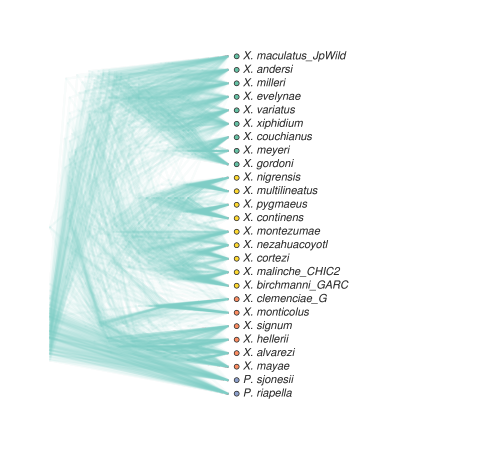

In [18]:
# draw the cloudtree
canvas, axes = cfish.draw_cloud_tree(
    height=450, 
    width=500,
    edge_style={
        'stroke': toyplot.color.brewer.palette("BlueGreen")[4],
        'opacity': 0.05,
    },
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in cfish.get_tip_labels()
    ],
);

# add colored nodes at the tips (x-axis=0) (y-axis=0-ntips)
xlocs = np.zeros(fish.ntips)
ylocs = np.arange(fish.ntips)
colors = np.concatenate([   
    [toytree.colors[2]] * 2,
    [toytree.colors[1]] * 6,
    [toytree.colors[5]] * 9,
    [toytree.colors[0]] * 9,
])
axes.scatterplot(
    xlocs + 0.05, 
    ylocs,
    color=colors,
    mstyle={"stroke": "black", "stroke-width": 0.5},
    size=5,
);

#### Save to disk as PDF

In [19]:
# write as PDF
import toyplot.pdf
toyplot.pdf.render(canvas, "fish-cloudtree.pdf")

In [20]:
# write the newick trees to file
cfish.write("fish-trees.tre")

#### Coloring edges differently: Example 1

MultiTrees objects are really useful for comparing tree topologies, especially when combined with CloudTree drawings and TreeNode calculations for comparing trees. In the examples below I create plots that color trees differently depending on their topology. 

In [21]:
# a linear color map 
colormap = toyplot.color.brewer.map("BlueGreen")
colormap

Using the colormap above, we'll color each tree as a continuous variable where darker indicates that the topology has a greater number of differences compared to the majority-rule consensus topology. We can calculate this using the Robinson-Foulds distance function. 

In [22]:
# get consensus tree
fishcons = cfish.get_consensus_tree()

# calculate RF distances relative to consensus tree
rfdists = np.array([
    fishcons.treenode.robinson_foulds(i.treenode, unrooted_trees=True)[0] 
    for i in cfish.treelist
])

# print the first 10 values
print(rfdists[:10], '...')

# broadcast values into colorspace
colors = toyplot.color.broadcast(
    colors=(rfdists, colormap),
    shape=rfdists.shape,
)

# return the first ten values a colors
colors[:10]

[10 16 20 14 25 13 18  9 21 20] ...


array([(0.07712418, 0.45490196, 0.69803922, 1.),
       (0.29673203, 0.69176471, 0.82196078, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.),
       (0.22352941, 0.61019608, 0.77803922, 1.),
       (0.70588235, 0.88496732, 0.73071895, 1.),
       (0.1869281 , 0.56941176, 0.75607843, 1.),
       (0.38823529, 0.74771242, 0.8       , 1.),
       (0.04052288, 0.4172549 , 0.67921569, 1.),
       (0.52941176, 0.81777778, 0.75294118, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.)],
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

CloudTrees take an extra argument `edge_styles`, which is different from the normal `edge_style` dictionary. The `edge_styles` argument must be a list of `edge_style` dictionaries that is the same length as the treelist. The styles will be applied to the subtrees in order. In the example below we apply a linear colormap to the trees in which trees that have greater difference from the consensus tree are lighter in color. You could imagine many such interesting ways in which to investigate tree variation using color mapping. 

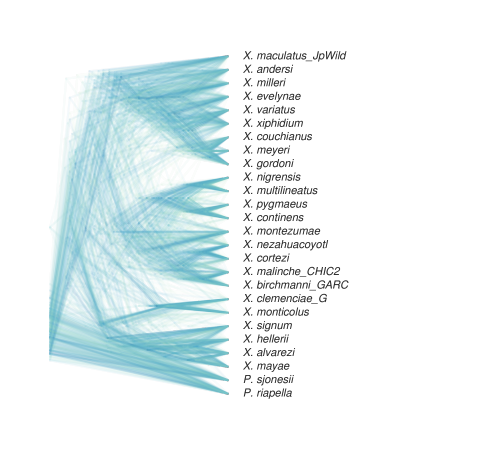

In [23]:
# create a list of edge_style dictionaries
edicts = [{"stroke": col, "opacity": 0.05} for col in colors]

# draw cfish tree with a list of arguments for edge_style
draw = cfish.draw_cloud_tree(
    height=450, 
    width=500,
    edge_styles=edicts,
    tip_labels=[
        "<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder],
);

#### Coloring edges differently: Example 2
Here we will color each trees edges based on whether a certain clade was observed (monophyletic) or not. We'll ask whether the clade (clemencieae, monticolus) exists by using the `.check_monophyly` function from the TreeNode of each tree in the treelist. 

In [ ]:
# get boolean list checking monophyly of clade I in each subtree
monophyly = [
    i.treenode.check_monophyly(('Xmonticolus', 'Xclemenciae_G'), "name")[0]
    for i in cfish.treelist
]

# translate boolean list into two color values
colormono = [
    toytree.colors[0] if i else toytree.colors[1] for i in monophyly
]

# plot cloud tree using edge_styles
draw = cfish.draw_cloud_tree(
    height=450, 
    width=500,
    edge_styles=[{"stroke": i, "opacity": 0.05} for i in colormono],
);

#### Xiphophorus consensus tree
You can order any normal Toytree as well by setting `fixed_order` when initiating the tree. Below I order a consensus tree into a toytree with fixed_order to be the same custom order that we used above. You can see that the Xiphophorus cloud tree above has fairly low agreement across most subtrees. The consensus tree _mostly_ matches the custom_order tree except for with *X. Xiphidium* which you can see has an edge crossing over with others. 

In [ ]:
fishcons = fish.get_consensus_tree()
fishcons = toytree.tree(fishcons.newick, fixed_order=customorder)
fishcons.draw(node_labels='support', use_edge_lengths=False);